In [1]:
import geopandas as gpd
import pandas as pd
import matplotlib.patches as mpatches
from matplotlib.lines import Line2D
import seaborn as sns
import matplotlib.pyplot as plt
from adjustText import adjust_text

# Replace 'your_shapefile_path' with the path to your shapefile
gdf = gpd.read_file('../../../data/raw/cb_2018_us_cbsa_500k.shp')
gdf_CT = gpd.read_file('../../../data/raw/cb_2018_us_state_500k.shp')
gdf_CT_census = gpd.read_file('../../../data/raw/cb_2018_09_bg_500k.shp')
gdf_counties = gpd.read_file('../../../data/raw/cb_2018_us_county_500k.shp')
gdf_towns = gpd.read_file('../../../data/raw/Town_Polygon.shp')

#county within urban area
gdf_county_urban = gpd.read_file('../../../data/raw/cb_2018_09_county_within_ua_500k.shp')

#urban area
#gdf_urban = gpd.read_file('../../../data/raw/cb_2018_us_ua10_500k.shp')

# Replace 'population_csv_path' with the path to your population data CSV
population = pd.read_excel('../../../data/raw/pop_towns2022 (1).xlsx')
population = population.iloc[16:185]
population  = population.reset_index(drop=True)
population
population = population.iloc[:, :-2]
new_column_index = ['TOWN', 'Population']

# Assign the new column index directly to the columns attribute
population.columns = new_column_index 

<span style="font-family: verdana; color: green; font-size: 20px;font-weight: bold;">Plot the urban area</span>

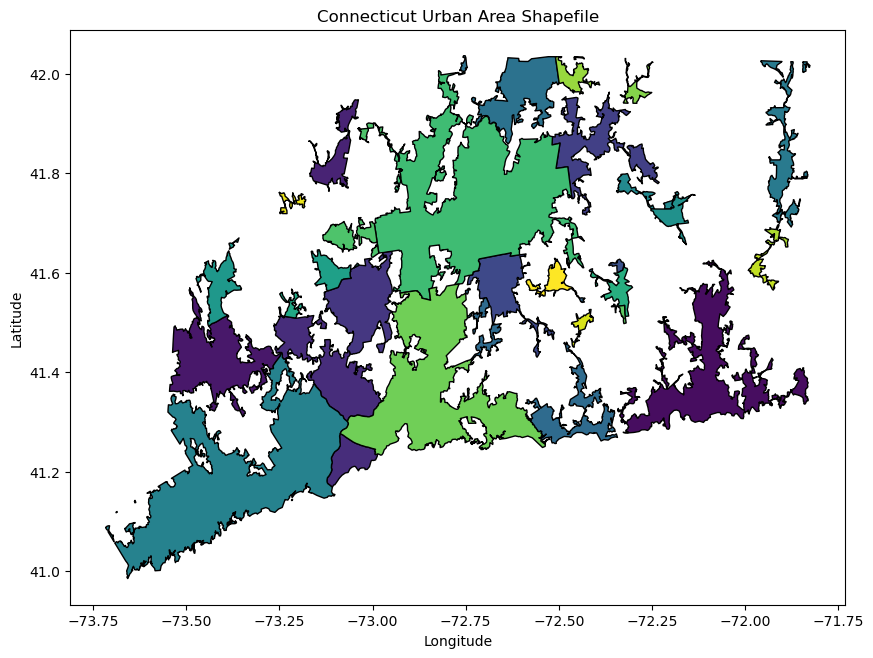

In [2]:
# Filter rows for Connecticut (assuming the 'STATEFP10' column contains state codes)
gdf_ct = gdf_county_urban[gdf_county_urban['STATEFP10'] == '09']

# Plot the GeoDataFrame for Connecticut
fig, ax = plt.subplots(figsize=(10, 8))
gdf_ct.plot(ax=ax, edgecolor='black', cmap='viridis')

# Add title and labels
plt.title('Connecticut Urban Area Shapefile')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Show the plot
plt.show()

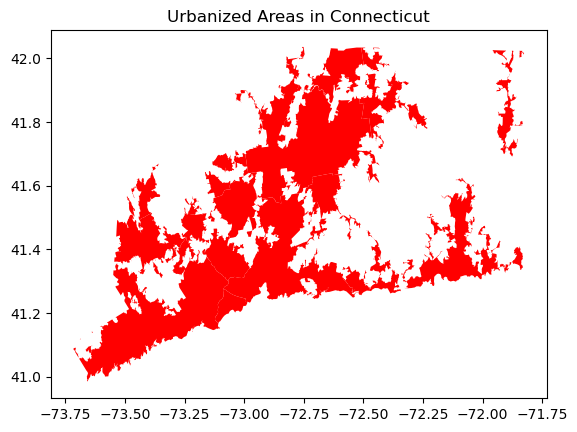

In [3]:
# Filter the data for urbanized areas and urban clusters
urbanized_areas = gdf_ct[gdf_ct['UATYP10'] == 'U']
urban_clusters = gdf_ct[gdf_ct['UATYP10'] == 'C']

# Plot the urbanized areas
fig, ax = plt.subplots()
urbanized_areas.plot(ax=ax, color='red')
ax.set_title('Urbanized Areas in Connecticut')
plt.show()

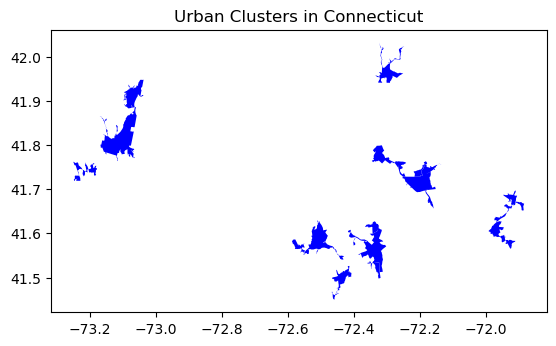

In [4]:
# Plot the urban clusters
fig, ax = plt.subplots()
urban_clusters.plot(ax=ax, color='blue')
ax.set_title('Urban Clusters in Connecticut')
plt.show()

In [5]:
#merge data with population
inland_data = gdf_towns[gdf_towns['COASTP_COD'] == 1]
sorted_df = inland_data.sort_values(by='ACREAGE', ascending=False)

# Keep only the first occurrence of each town name (largest ACREAGE)
town_final = sorted_df.drop_duplicates(subset='TOWN', keep='first')
town_final  = town_final.sort_values(by='TOWN')
town_final.reset_index(drop=True, inplace=True)
town_final['TOWN'] = town_final['TOWN'].str.upper()
merged_data = pd.merge(town_final, population, how="left", left_on="TOWN", right_on="TOWN")

COLCHESTER = town_final.loc[town_final['TOWN'] == 'COLCHESTER']
LYME = town_final.loc[town_final['TOWN'] == 'LYME']
OLDLYME = town_final.loc[town_final['TOWN'] == 'OLD LYME']
BRIDGEWATER = town_final.loc[town_final['TOWN'] == 'BRIDGEWATER']
NEWMILFORD = town_final.loc[town_final['TOWN'] == 'NEW MILFORD']

CT_result = gdf_CT[gdf_CT['STUSPS'] == 'CT']
result = gdf[gdf['NAME'].str.contains('CT')]

CT_result = gdf_CT[gdf_CT['STUSPS'] == 'CT']
result = gdf[gdf['NAME'].str.contains('CT')]
#extract a single row out as the dataframe
HEM = result.iloc[0:1]
NHM = result.iloc[3:4]
BSN = result.iloc[4:5]

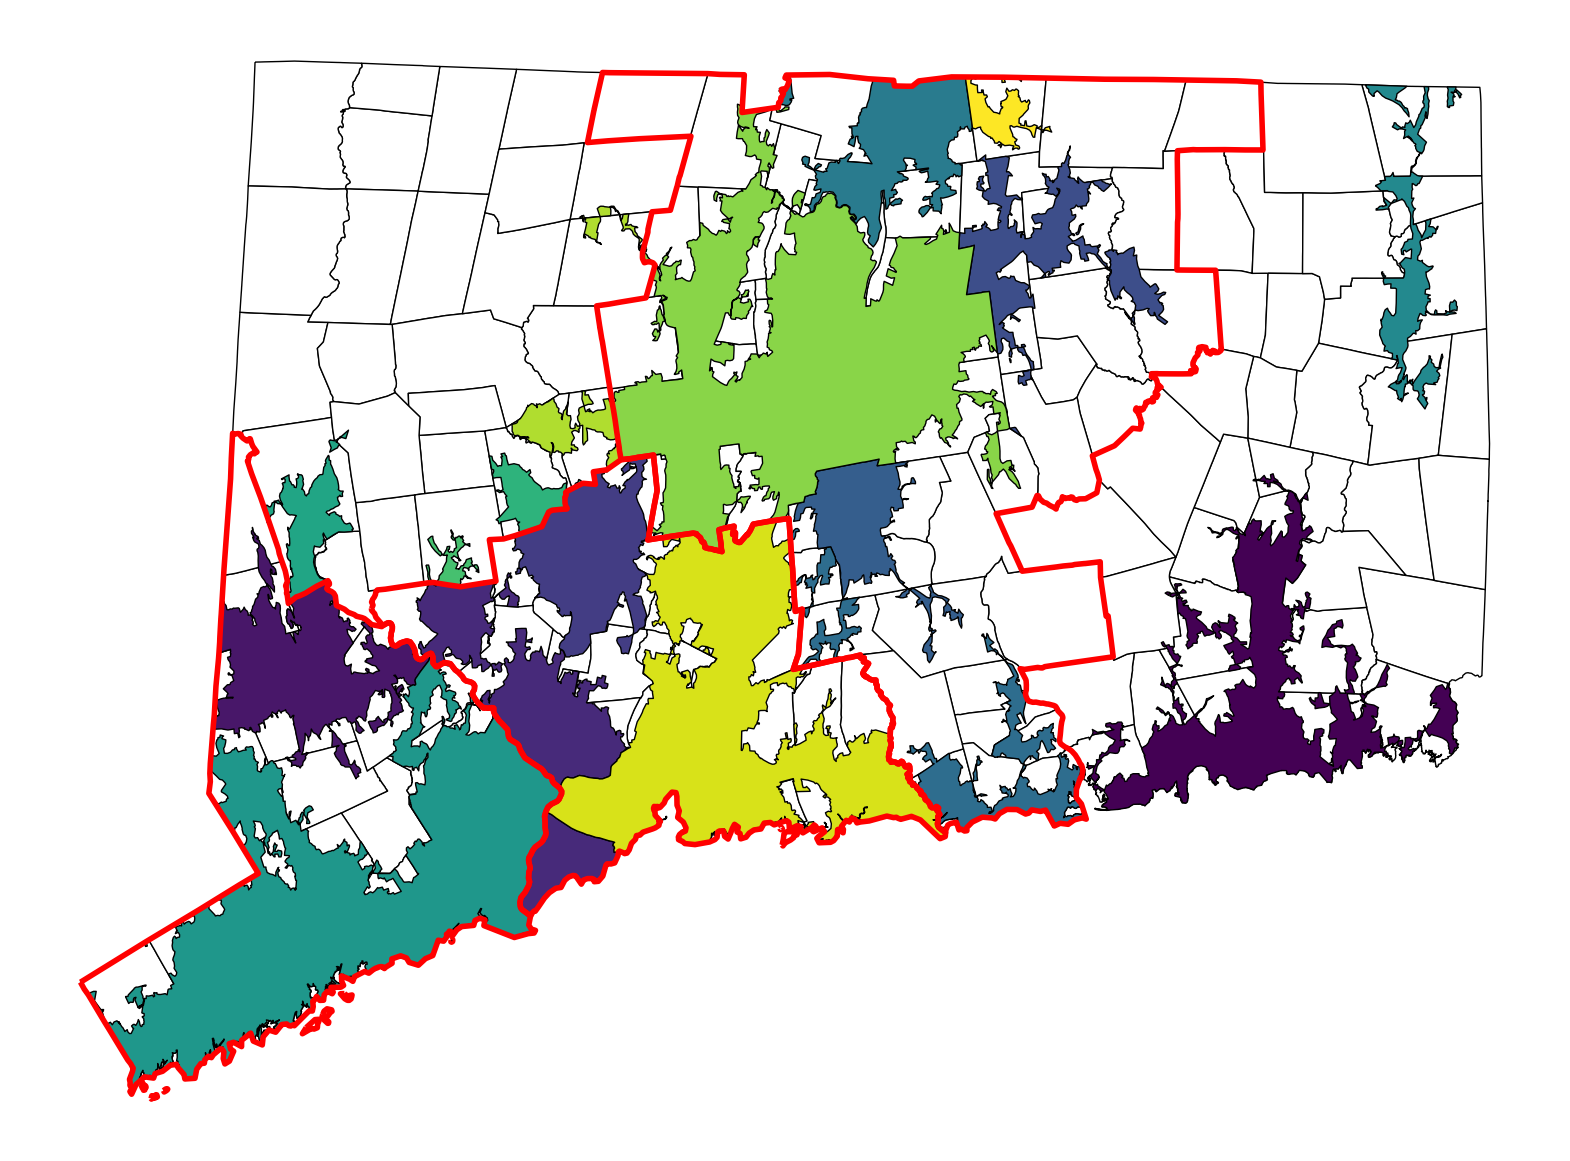

In [6]:
# Plot the heatmap with town boundaries
fig, ax = plt.subplots(1, 1, figsize=(20, 15))
ax.set_axis_off()
town_final.plot(ax=ax, color='white', edgecolor='black')  # Plot town boundaries

# Plot the New Haven-Milford MSA and fill it with a color matching the heatmap
NHM.boundary.plot(ax=ax, linewidth=4, color='red')  # Choose a color from the YlOrRd colormap
#NHM.plot(ax=ax, facecolor='darkorange', alpha=0.5)

# Plot the Hartford-East Hartford-Middletown MSA, fill it with a color matching the heatmap
HEM.boundary.plot(ax=ax, linewidth=4, color='red')  # Choose a color from the YlOrRd colormap
#HEM.plot(ax=ax, facecolor='darkorange', alpha=0.5)

# Plot the Bridgeport-Stamford-Norwalk MSA, fill it with a color matching the heatmap
BSN.boundary.plot(ax=ax, linewidth=4, color='red')  # Choose a color from the YlOrRd colormap
#BSN.plot(ax=ax, facecolor='darkorange', alpha=0.5)

#plot the urbanized area and urban cluster
urbanized_areas.plot(ax=ax, edgecolor='black', cmap='viridis')


#plt.show()
plt.savefig('../../../figures/Report-images/CT-urbanized-area.png',dpi=600, bbox_inches='tight')

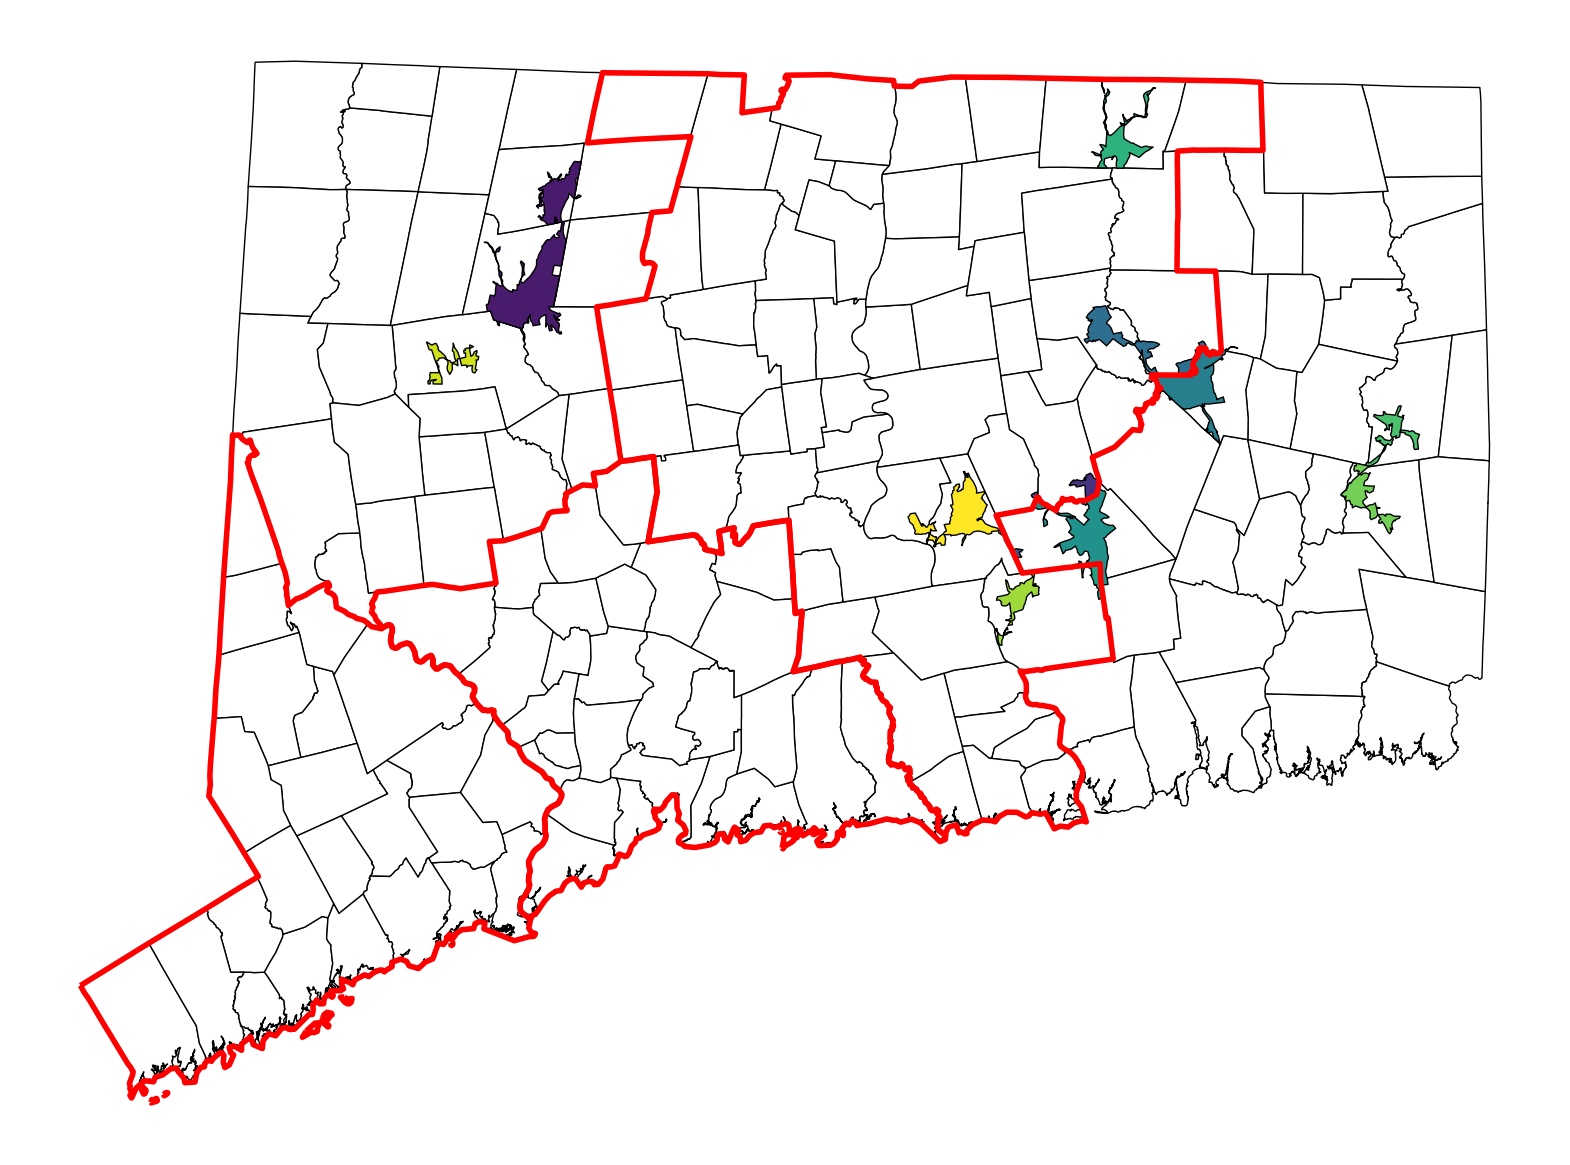

In [7]:
# Plot the heatmap with town boundaries
fig, ax = plt.subplots(1, 1, figsize=(20, 15))
ax.set_axis_off()
town_final.plot(ax=ax, color='white', edgecolor='black')  # Plot town boundaries

# Plot the New Haven-Milford MSA and fill it with a color matching the heatmap
NHM.boundary.plot(ax=ax, linewidth=4, color='red')  # Choose a color from the YlOrRd colormap
#NHM.plot(ax=ax, facecolor='darkorange', alpha=0.5)

# Plot the Hartford-East Hartford-Middletown MSA, fill it with a color matching the heatmap
HEM.boundary.plot(ax=ax, linewidth=4, color='red')  # Choose a color from the YlOrRd colormap
#HEM.plot(ax=ax, facecolor='darkorange', alpha=0.5)

# Plot the Bridgeport-Stamford-Norwalk MSA, fill it with a color matching the heatmap
BSN.boundary.plot(ax=ax, linewidth=4, color='red')  # Choose a color from the YlOrRd colormap
#BSN.plot(ax=ax, facecolor='darkorange', alpha=0.5)

#plot the urbanized area and urban cluster
urban_clusters.plot(ax=ax, edgecolor='black', cmap='viridis')

#plt.show()
plt.savefig('../../../figures/Report-images/CT-urban-cluster.png',dpi=600, bbox_inches='tight')

<span style="font-family: verdana; color: green; font-size: 20px;font-weight: bold;">Calculate the proportion of urban area within the MSA to that within the state</span>

<span style="font-family: verdana; color: green; font-size: 15px;font-weight: bold;">Calculate the urbanized area</span>

In [8]:
#calculate the total urbanized area in CT
total_urbanized_CT = urbanized_areas.area.sum()

#Calculate the total area of the CT
ct_boundary = gdf_CT.iloc[55,:]
ct_area = ct_boundary.geometry.area

#calculate the urbanized area in each MSA

def calculate_urbanized_area(urbanized_areas, msa_boundary):
    # Clip the urbanized areas to the boundaries of the MSA
    urbanized_areas_within_msa = gpd.clip(urbanized_areas, msa_boundary)
    # Calculate the total area of the urbanized area within the MSA
    total_urbanized_area_within_msa = urbanized_areas_within_msa.area.sum()

    return total_urbanized_area_within_msa

# Calculate percentage of urbanized area within each MSA
urbanized_area_NHM = calculate_urbanized_area(urbanized_areas, NHM)
urbanized_area_HEM = calculate_urbanized_area(urbanized_areas, HEM)
urbanized_area_BSN = calculate_urbanized_area(urbanized_areas, BSN)

print(urbanized_area_NHM,urbanized_area_HEM,urbanized_area_BSN,total_urbanized_CT,ct_area)

0.12442108303173725 0.17808484862578566 0.12649778319802704 0.4984251223388735 1.39667886770547


C:\Users\peiyaozhao\AppData\Local\Temp\ipykernel_19120\643218039.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  total_urbanized_CT = urbanized_areas.area.sum()
C:\Users\peiyaozhao\AppData\Local\Temp\ipykernel_19120\643218039.py:14: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  total_urbanized_area_within_msa = urbanized_areas_within_msa.area.sum()
C:\Users\peiyaozhao\AppData\Local\Temp\ipykernel_19120\643218039.py:14: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  total_urbanized_area_within_msa = urbanized_areas_within_msa.area.sum()
C:\Users\peiyaozhao\AppData\Local\Temp\ipyke

<span style="font-family: verdana; color: green; font-size: 15px;font-weight: bold;">Calculate the urban cluster</span>

In [9]:
#calculate the total urban cluster in CT
total_urban_clusters_CT = urban_clusters.area.sum()

def calculate_urbancluster(urbancluster, msa_boundary):
    # Clip the urbanized areas to the boundaries of the MSA
    urbancluster_msa = gpd.clip(urbancluster, msa_boundary)
    # Calculate the total area of the urbanized area within the MSA
    total_urbancluster_within_msa = urbancluster_msa.area.sum()

    return total_urbancluster_within_msa

# Calculate percentage of urbanized area within each MSA
urbancluster_NHM = calculate_urbancluster(urban_clusters, NHM)
urbancluster_HEM = calculate_urbancluster(urban_clusters, HEM)
urbancluster_BSN = calculate_urbancluster(urban_clusters, BSN)

print(urbancluster_NHM,urbancluster_HEM,urbancluster_BSN,total_urban_clusters_CT,ct_area)

0.0 0.008774305392884254 0.0 0.02574038306849983 1.39667886770547


C:\Users\peiyaozhao\AppData\Local\Temp\ipykernel_19120\4052581971.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  total_urban_clusters_CT = urban_clusters.area.sum()
C:\Users\peiyaozhao\AppData\Local\Temp\ipykernel_19120\4052581971.py:8: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  total_urbancluster_within_msa = urbancluster_msa.area.sum()
C:\Users\peiyaozhao\AppData\Local\Temp\ipykernel_19120\4052581971.py:8: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  total_urbancluster_within_msa = urbancluster_msa.area.sum()
C:\Users\peiyaozhao\AppData\Local\Temp\ipykernel_19120\40525819

<span style="font-family: verdana; color: green; font-size: 15px;font-weight: bold;">Calculate the rural area</span>

In [10]:
#calculate the total urban cluster in CT
total_rural_area_CT = ct_area-total_urbanized_CT-total_urban_clusters_CT 

NHM_area = NHM.geometry.area
HEM_area = HEM.geometry.area
BSN_area = BSN.geometry.area

ruralarea_NHM = NHM_area-urbancluster_NHM-urbanized_area_NHM
ruralarea_HEM = HEM_area-urbancluster_HEM-urbanized_area_HEM
ruralarea_BSN = BSN_area-urbancluster_BSN-urbanized_area_BSN

print(ruralarea_NHM,ruralarea_HEM ,ruralarea_BSN)

781    0.048713
dtype: float64 271    0.248535
dtype: float64 939    0.055482
dtype: float64


C:\Users\peiyaozhao\AppData\Local\Temp\ipykernel_19120\3534206773.py:4: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  NHM_area = NHM.geometry.area
C:\Users\peiyaozhao\AppData\Local\Temp\ipykernel_19120\3534206773.py:5: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  HEM_area = HEM.geometry.area
C:\Users\peiyaozhao\AppData\Local\Temp\ipykernel_19120\3534206773.py:6: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  BSN_area = BSN.geometry.area


<span style="font-family: verdana; color: green; font-size: 15px;font-weight: bold;">Calculate the proportion of the MSA to the CT</span>

In [11]:
#calculate the ratio of urbanized area
ratio_urbanized_NHM =urbanized_area_NHM/total_urbanized_CT 
ratio_urbanized_HEM =urbanized_area_HEM/total_urbanized_CT 
ratio_urbanized_BSN =urbanized_area_BSN/total_urbanized_CT 

print(ratio_urbanized_NHM,ratio_urbanized_HEM,ratio_urbanized_BSN)

0.24962843455379602 0.3572950893609007 0.2537949584170893


In [12]:
#calculate the ratio of urban cluster
ratio_urbancluster_NHM =urbancluster_NHM/total_urban_clusters_CT 
ratio_urbancluster_HEM =urbancluster_HEM/total_urban_clusters_CT
ratio_urbancluster_BSN =urbancluster_BSN/total_urban_clusters_CT

print(ratio_urbancluster_NHM,ratio_urbancluster_HEM,ratio_urbancluster_BSN)

0.0 0.3408770323865902 0.0


In [13]:
#calculate the proportion of rural area
ratio_ruralarea_NHM =ruralarea_NHM/total_rural_area_CT
ratio_ruralarea_HEM =ruralarea_HEM/total_rural_area_CT
ratio_ruralarea_BSN =ruralarea_BSN/total_rural_area_CT

print(ratio_ruralarea_NHM,ratio_ruralarea_HEM,ratio_ruralarea_BSN)

781    0.05583
dtype: float64 271    0.284849
dtype: float64 939    0.063588
dtype: float64


In [14]:
# Define data for the DataFrame
data = {
    'Area': ['New Haven', 'Hartford', 'Bridgeport'],
    'UA': [ratio_urbanized_NHM, ratio_urbanized_HEM,ratio_urbanized_BSN],
    'UC': [ratio_urbancluster_NHM,ratio_urbancluster_HEM,ratio_urbancluster_BSN],
    'RA': [ratio_ruralarea_NHM.iloc[0],ratio_ruralarea_HEM.iloc[0],ratio_ruralarea_BSN.iloc[0]]
}

# Create the DataFrame
df = pd.DataFrame(data)
df.to_csv('../../../results/proportion_ua_uc_ra.csv')

<Axes: >

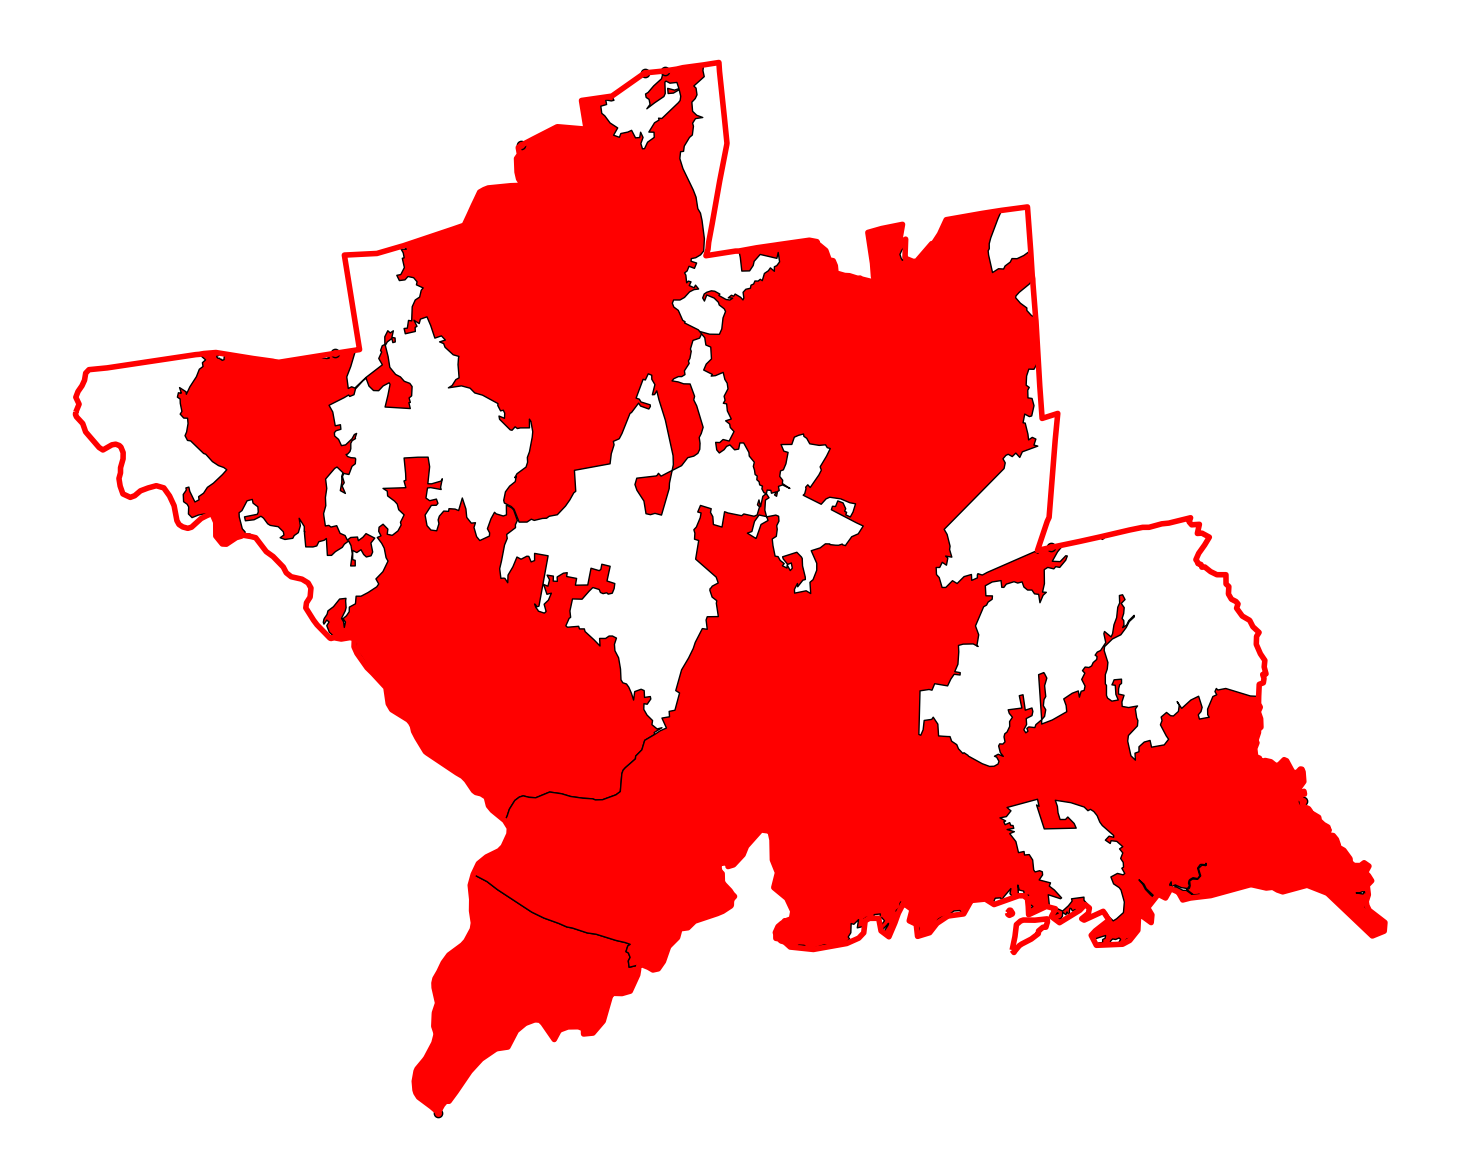

In [15]:
#urbanized area/urban cluster in the New Haven county
fig, ax = plt.subplots(1, 1, figsize=(20, 15))
ax.set_axis_off()

urbanized_areas_within_msa = gpd.clip(gdf_ct, NHM)
urbanized_areas_within_msa.plot(ax=ax, color='red', edgecolor='black')  # Plot town boundaries

# Plot the New Haven-Milford MSA and fill it with a color matching the heatmap
NHM.boundary.plot(ax=ax, linewidth=4, color='red')  # Choose a color from the YlOrRd colormap
#NHM.plot(ax=ax, facecolor='darkorange', alpha=0.5)

<Axes: >

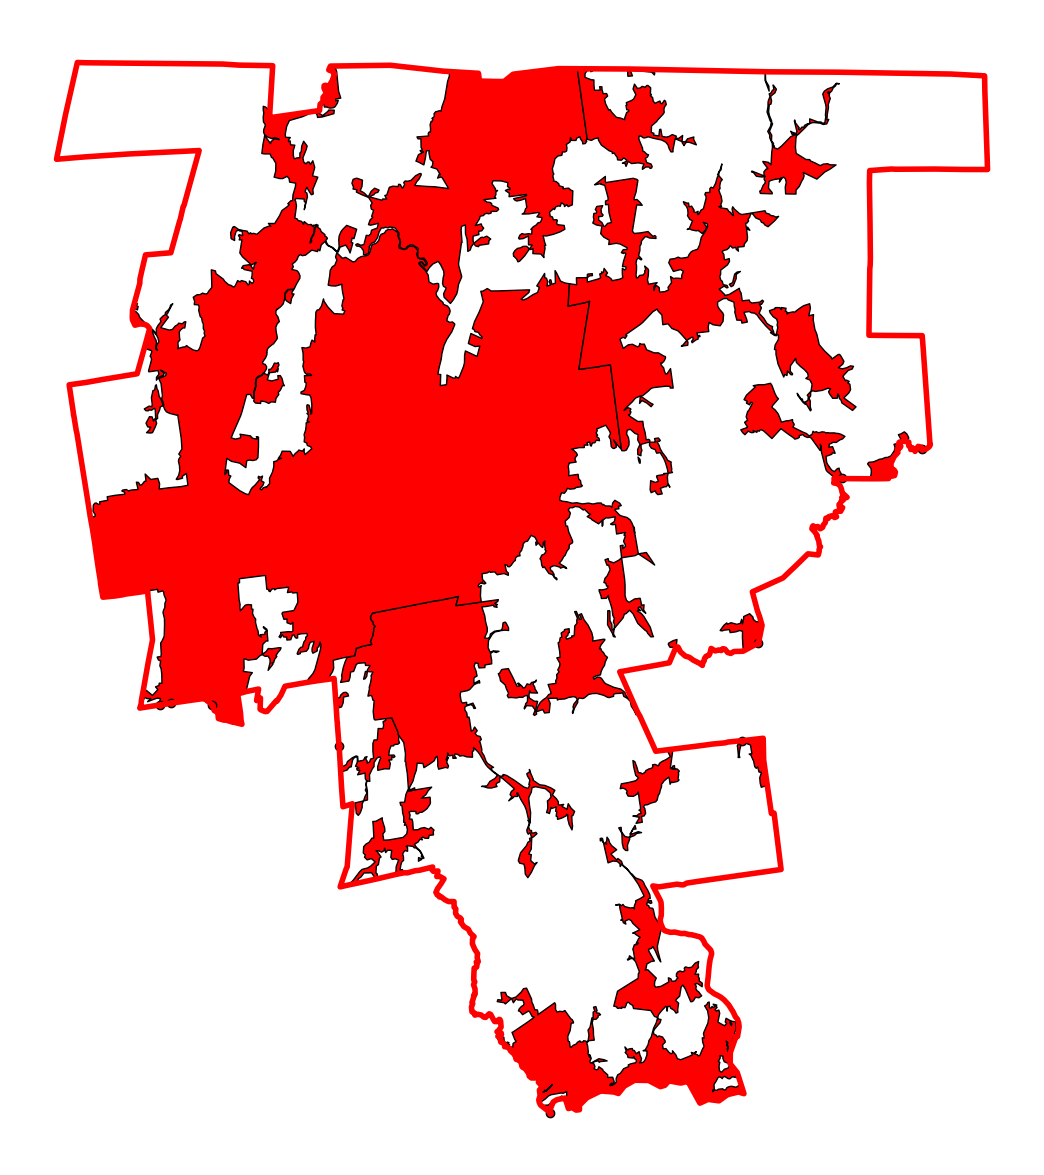

In [16]:
#urbanized area/urban cluster in the New Haven county
fig, ax = plt.subplots(1, 1, figsize=(20, 15))
ax.set_axis_off()

urbanized_areas_within_msa = gpd.clip(gdf_ct, HEM)
urbanized_areas_within_msa.plot(ax=ax, color='red', edgecolor='black')  # Plot town boundaries

# Plot the New Haven-Milford MSA and fill it with a color matching the heatmap
HEM.boundary.plot(ax=ax, linewidth=4, color='red')  # Choose a color from the YlOrRd colormap
#NHM.plot(ax=ax, facecolor='darkorange', alpha=0.5)

<Axes: >

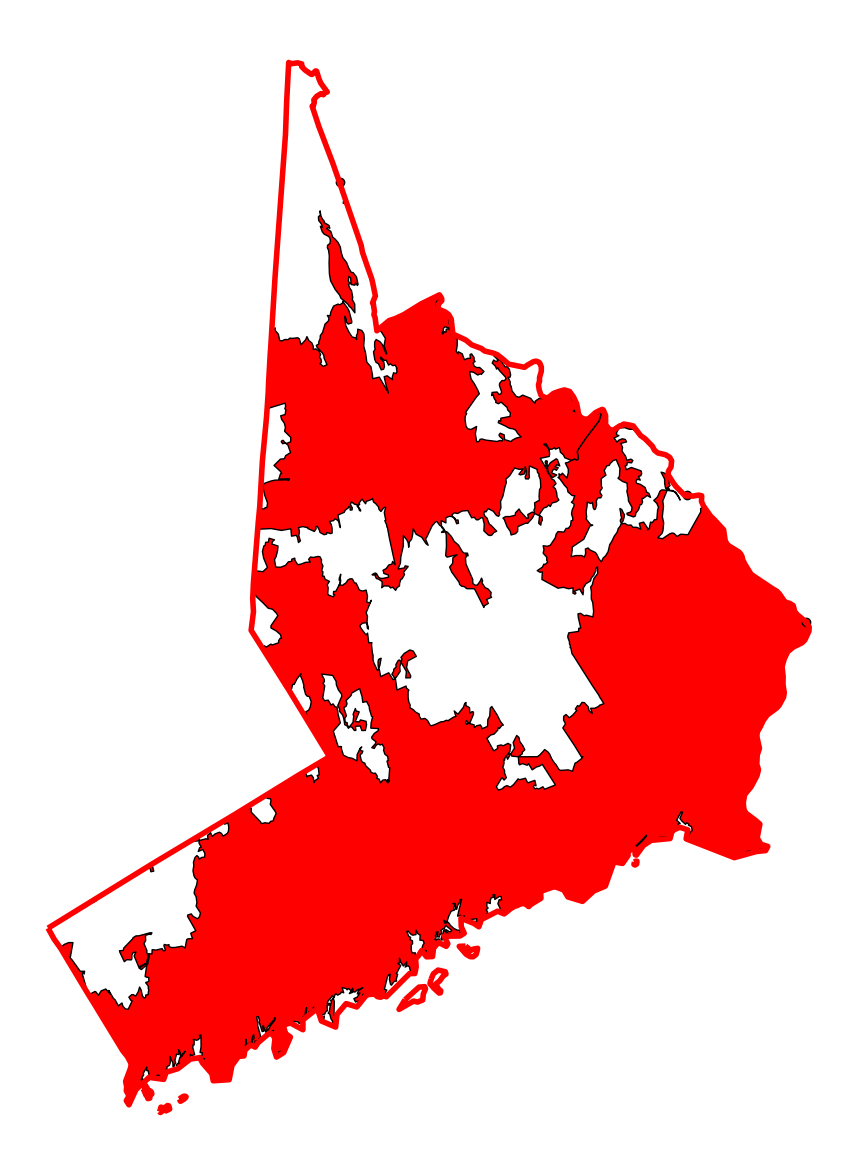

In [17]:
#urbanized area/urban cluster in the New Haven county
fig, ax = plt.subplots(1, 1, figsize=(20, 15))
ax.set_axis_off()

urbanized_areas_within_msa = gpd.clip(gdf_ct, BSN)
urbanized_areas_within_msa.plot(ax=ax, color='red', edgecolor='black')  # Plot town boundaries

# Plot the New Haven-Milford MSA and fill it with a color matching the heatmap
BSN.boundary.plot(ax=ax, linewidth=4, color='red')  # Choose a color from the YlOrRd colormap
#NHM.plot(ax=ax, facecolor='darkorange', alpha=0.5)